<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Reading_Writing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading / Writing data

Page 125-144

Pandas supports the integration of many file formats and data sources out of the box (csv, excel, sql, json, parquet)

## Reading data in text format
* The function pd.read_csv() allows you to read a file and store it in a DataFrame
- With the default options, files must have a header and the seperator is a comma 
- The file could be both on a disk or on the network 

In [0]:
import pandas as pd

#pd.read_csv("./Sacramentorealestatetransactions.csv")
housing = pd.read_csv("http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv")

In [2]:
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


The `pd.read_table()`function allows you to set the separator using the `sep` argument

In [3]:
%%writefile input_data.txt
a|b|c|d|message
1|2|3|4|hello
5|6|7|8|world
9|10|11|12|foo

Writing input_data.txt


In [4]:
pd.read_csv("input_data.txt", sep="|")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


The header parameter allows you to set whether or not a header exists

In [5]:
pd.read_csv("input_data.txt", sep="|", header =None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


The na_values parameter specifies the null values 

In [6]:
%%writefile input_data.txt
a|b|c|d|message
1|2|3|NA|hello
5|6|7|8|world
9|NA|11|12|foo

Overwriting input_data.txt


In [7]:
pd.read_table("input_data.txt", sep="|", na_values=["NA"])

,a,b,c,d,message
0,1,2.0,3,NaN,hello
1,5,6.0,7,8.0,world
2,9,NaN,11,12.0,foo


The `pd.read_fwf()`function allows you to read a file when the columns have fixed positions

In [8]:
%%writefile input_data.txt
a b   c   d   message
1 2   223 NA  hello
5 6   7   8   world
9 10  11  12  foo

Overwriting input_data.txt


In [9]:
pd.read_fwf("input_data.txt")

,a,b,c,d,message
0,1,2,223,NaN,hello
1,5,6,7,8.0,world
2,9,10,11,12.0,foo


The converters parameter allows you to set conversion functions in the columns of the DataFrame 

In [10]:
%%writefile input_data.txt
col1|col2|col3
one|1.232,12|a
two|2.000,32|b

Overwriting input_data.txt


In [11]:
pd.read_csv("input_data.txt", sep="|",
            converters={"col2":lambda value: float(value.replace(".","").replace(",","."))})

,col1,col2,col3
0,one,1232.12,a
1,two,2000.32,b


## Reading data from Excel 
- Pandas also allows you to read an Excel format file 
- If we want to read several sheets of the same Excel file, it is convenient to first load the file into memeory with the `pd.ExcelFile()` method

In [0]:
# df = pd.read_excel("Example_File.xlsx")
# df = pd.read_excel("Example_File.xlsx", "Example_Sheet")

# xlsx = pd.ExcelFile("Example_file.xlsx")
# df = pd.read_excel(xlsx, "Example_Sheet")

## Reading data from a JSON file

- Using the `pd.read_json()`function, pandas will read data in JSON format and load it into a DataFrame 

In [13]:
%%writefile input_data.json
[ {"a": 1, "b":2, "c":3},
  {"a": 4, "b":5, "c":6},
  {"a": 7, "b":8, "c":9}]

Writing input_data.json


In [14]:
pd.read_json("input_data.json")

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


An alternative is to use the json library to read the file 

In [15]:
import json 

with open("input_data.json") as json_data:
  result = json.load(json_data)

pd.DataFrame(result[:], columns =["a","b","c"])

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#Reading data from a Web Service
- To read the data of a web service we could use the request library

In [16]:
import requests

url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)

if resp.ok:
  data = resp.json()
  dataframe = pd.DataFrame(data, columns=["number", "title","labels","state"])

dataframe.head()

,number,title,labels,state
0,34003,Backport PR #32870 on branch 1.0.x (DOC: Remov...,[],open
1,34002,BUG: read_csv() wrong reading if comment-chara...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,34001,Backport PR #33629 on branch 1.0.x (BUG: Fix C...,[],open
3,33999,Failing test_missing_required_dependency in pa...,"[{'id': 48070600, 'node_id': 'MDU6TGFiZWw0ODA3...",open
4,33997,BUG:,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open


## Reading data from HTML
- Pandas allows to read a file with HTML format through the `read_html()` function
- This function returns a list of dataframes (there may be several tables on the website

In [17]:
dataframes = pd.read_html("https://fdic.gov/bank/individual/failed/banklist.html")
dataframes[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"


## Data Writing
- Once we have a DataFrame in memory, we could write it to disk with one of the following functions:
  - `dataframe.to_csv("file.csv")`
  - `dataframe.to_excel("file.xlsx")`
  - `dataframe.to_json("file.json")`

In [0]:
xlsx = pd.ExcelWriter("file.xlsx")
dataframe.to_excel(xlsx)
xlsx.save()

## Reading data from a database
The sqlalchemy package allows you to connect to a database and load DataFrames from tables or queries

In [0]:
from sqlalchemy import create_engine 
# engine = create_engine("sqlite:///:memory:")
# pd.read_sql("SELECT * FROM tabla;", engine)
# pd_read_sql_table("table", engine)

# Exercise 23
- Load the information from the following url into a Dataframe called "df1"
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv


- Load the information from the following url into a Dataframe called "df2"
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
  - The column 'user_id' must be the index of the DataFrame

In [20]:
df1 = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",
                    )

df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [21]:
df2 = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", 
              sep ="|", 
              #header=None, 
              index_col= "user_id" 
              )

df2.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


# Exercise 24
- Write the dataframes from the previous exercise in an excel called "Data.xlsx"
  - df1' save it on a sheet called 'chipotle' (without the index)
  - 'df2' on another sheet called 'user'
- Recover in a different DataFrame the information from the 'user' sheet of the excel file "Data.xlsx".

# Exercise 25
- Read the data from the following web service in a DataFrame 
https://sedeaplicaciones.minetur.gob.es/ServiciosRESTCarburantes/PreciosCarburantes/EstacionesTerrestres/



# Exploring a DataFrame
- Pandas offers several functions to explore a Dataframe without printing all the content
-The `dataframe.shape` attribute shows the dimensions (number of rows and number of columns)

In [22]:
import pandas as pd
import os 

os.chdir("/content/sample_data")

dataframe = pd.read_csv("california_housing_test.csv")
dataframe.shape

(3000, 9)

## dataframe.columns & dataframe.index
- The `dataframe.columns` attribute shows the columns
- The `dataframe.index` attribute shows the indexes 

In [23]:
dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [24]:
dataframe.index

RangeIndex(start=0, stop=3000, step=1)

## `df.head()`
- df.head() shows the first rows of the DataFrame (5 by default)

In [25]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## `df.tail()`

- df.tail() shows the last rows of the DataFrame

In [26]:
dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


## `df.sample()`


- df.sample() shows an example of the dataframe

In [27]:
dataframe.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
874,-122.37,38.33,29.0,1868.0,291.0,764.0,284.0,4.8250,195100.0
1372,-118.23,34.21,29.0,2584.0,608.0,1217.0,568.0,3.3287,273400.0
424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826,145500.0
438,-119.11,35.39,22.0,984.0,176.0,451.0,170.0,3.2500,88900.0
2771,-121.99,37.83,16.0,2939.0,380.0,1177.0,396.0,8.0839,372000.0


##`df.info()`
- shows summary information about the
DataFrame

In [28]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


## `df.count()`
- returns an array with the number of non-null values fro each of the columns

In [29]:
dataframe.count()

longitude             3000
latitude              3000
housing_median_age    3000
total_rooms           3000
total_bedrooms        3000
population            3000
households            3000
median_income         3000
median_house_value    3000
dtype: int64

In [30]:
dataframe.count(axis =1)

0       9
1       9
2       9
3       9
4       9
       ..
2995    9
2996    9
2997    9
2998    9
2999    9
Length: 3000, dtype: int64

## `df.describe()`
- returns a DataFrame with statistical information on each of the numerical columns

In [31]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


## `df.cov()` 
- returns a DataFrame with the result of
applying the covariance function in each of the
numerical columns (all with all)

In [32]:
dataframe.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,3.979771,-3.929984,-1.608112,2.144331e+02,5.876508e+01,2.293768e+02,3.722418e+01,-0.069188,-1.143276e+04
latitude,-3.929984,4.535492,-0.672300,-1.819390e+02,-6.041129e+01,-2.574793e+02,-5.314994e+01,-0.285796,-3.334838e+04
housing_median_age,-1.608112,-0.672300,157.637958,-9.955608e+03,-1.686447e+03,-3.880217e+03,-1.400132e+03,-3.360256,1.298250e+05
total_rooms,214.433055,-181.938962,-9955.608036,4.646583e+06,8.402063e+05,1.863485e+06,7.200520e+05,884.457656,3.911853e+07
total_bedrooms,58.765078,-60.411288,-1686.447113,8.402063e+05,1.727686e+05,3.668332e+05,1.474479e+05,18.519657,3.868661e+06
population,229.376803,-257.479345,-3880.217212,1.863485e+06,3.668332e+05,1.062019e+06,3.372421e+05,61.845972,-1.389295e+05
households,37.224178,-53.149936,-1400.131655,7.200520e+05,1.474479e+05,3.372421e+05,1.335338e+05,32.952200,4.140940e+06
median_income,-0.069188,-0.285796,-3.360256,8.844577e+02,1.851966e+01,6.184597e+01,3.295220e+01,3.439214,1.411192e+05
median_house_value,-11432.762614,-33348.376798,129825.029543,3.911853e+07,3.868661e+06,-1.389295e+05,4.140940e+06,141119.191538,1.279606e+10


## `df.corr()` 
- returns a DataFrame with the result of
applying the correlation function in each of the numerical columns (all with all)

In [33]:
dataframe.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


## Visualize df.corr()
Using the Python visualization tools we could visualize the correlation matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


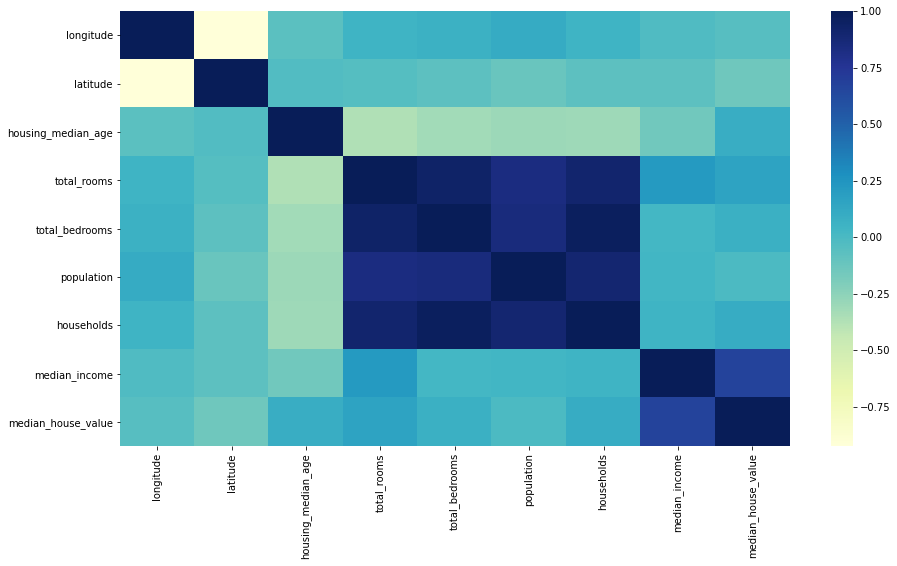

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

corr = dataframe.corr()
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            cmap="YlGnBu")

# Exercise 26 
1. Load the anscombe.json from the sample_data
2. Show the dimensions of the DataFrame
3. Print the columns and row indexes
4. It shows the first 3 rows
5. Shows the last 2 rows
6. Displays summary information about the Dataframe
7. Check if any of the columns correlate with any other
8. Shows the number of values in each of the columns
9. Displays statistical information about the column ‘V’

In [0]:
# 1. Loading data 
os.chdir("/content/sample_data")
df = pd.read_json("anscombe.json")

In [36]:
# 2. Show the dimensions of DF
df.shape

(44, 3)

In [37]:
# 3. Print column and row indices
print(df.columns)
print(df.index)

Index(['Series', 'X', 'Y'], dtype='object')
RangeIndex(start=0, stop=44, step=1)


In [38]:
# 4. Show the first 3 rows
df.head(3)

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58


In [39]:
# 5. Show the last 2 rows
df.tail(2)

,Series,X,Y
42,IV,8,7.91
43,IV,8,6.89


In [40]:
# 6. Display a summary of statistical info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [41]:
# 7. Check if columns correlate
print(df.corr())
print(df.cov())

          X         Y
X  1.000000  0.816308
Y  0.816308  1.000000
           X         Y
X  10.232558  5.116047
Y   5.116047  3.838637


In [42]:
# 8. Show number of values in each of the columns
df.count()

Series    44
X         44
Y         44
dtype: int64

In [43]:
# 9. Display statistical information 
df.describe()

,X,Y
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


# Operations on a DataFrame

## Common operations in a Dataframe
- Pandas allows to do operations like filtering a Dataframe, ordering it, selecting columns, renaming them, modifying them and even grouping them
- What all these functions have in common is that they do not modify the dataframe, but return another dataframe

In [44]:
df = pd.DataFrame({"C1" : ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
                   "C2" : [1999, 2000,1999,2000,1999,2000],
                   "C3" : [745, 266,37737,80488,212258,213766],
                   "C4" : [19987071,20595360,172006362,174504898,1272915272,1280428583]})

df

,C1,C2,C3,C4
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


## Rename columns
- The `rename()` function allows you to rename both the row index and the column index of a Dataframe

In [45]:
df = df.rename(columns = {"C1": "Country",
                          "C2": "Year",
                          "C3": "Cases",
                          "C4": "Population"})

df

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


The rename() function could **accept a function to make the modification** , instead of a dictionary

In [46]:
df.rename(columns = lambda column :column.lower())

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [47]:
df.rename(index = lambda row : "Row"+str(row))

,Country,Year,Cases,Population
Row0,Afghanistan,1999,745,19987071
Row1,Afghanistan,2000,266,20595360
Row2,Brazil,1999,37737,172006362
Row3,Brazil,2000,80488,174504898
Row4,China,1999,212258,1272915272
Row5,China,2000,213766,1280428583


# Exercise 27
- Explore the DataFrame “liga”:
- Rename the name of the columns making sure they are
materialized in the dataset

In [0]:
liga = pd.read_excel("/content/LigaBBVA_20170329_full.xlsx")

In [54]:
liga.head()

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia
3,4,Atlético Madrid,28,16,7,5,52,23,55,29,7.0,0.064356,0.571429,240,Champions,Madrid,Madrid
4,5,Villarreal,28,13,9,6,39,20,48,19,0.0,0.048267,0.464286,288,Normal,Castellón,Comunidad Valenciana


In [0]:
liga = liga.rename(columns= {"#" : "Puesto",
             "PJ": "Partidos Jugados",
             "V": "Victorias",
             "E": "Empates",
             "D": "Derrotas",
             "GF": "Goles Favor",
             "GC": "Goles Contra",
             "PTS": "Puntos"})

In [56]:
liga.head()

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia
3,4,Atlético Madrid,28,16,7,5,52,23,55,29,7.0,0.064356,0.571429,240,Champions,Madrid,Madrid
4,5,Villarreal,28,13,9,6,39,20,48,19,0.0,0.048267,0.464286,288,Normal,Castellón,Comunidad Valenciana


# Exercise 28
- Rename the columns, so that they are in capital letters 
- but do not save it in the DataFrame

In [57]:
liga.rename(columns = lambda columns: columns.upper()).head()

,PUESTO,EQUIPO,PARTIDOSJUGADOS,VICTORIAS,EMPATES,DERROTAS,GOLESFAVOR,GOLESCONTRA,PUNTOS,DIFERENCIAGOLES,DIFERENCIAPUNTOS,PORCENTAJEGOLES,PORCENTAJEVICTORIAS,PUNTOSACUM,ZONA,PROVINCIA,COMUNIDAD AUTÓNOMA
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia
3,4,Atlético Madrid,28,16,7,5,52,23,55,29,7.0,0.064356,0.571429,240,Champions,Madrid,Madrid
4,5,Villarreal,28,13,9,6,39,20,48,19,0.0,0.048267,0.464286,288,Normal,Castellón,Comunidad Valenciana


## Column selection 
- There is no specific function to select columns in Panda
- Just use an an array of names 

In [58]:
df

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [59]:
df[["Year", "Country", "Country"]]

,Year,Country,Country
0,1999,Afghanistan,Afghanistan
1,2000,Afghanistan,Afghanistan
2,1999,Brazil,Brazil
3,2000,Brazil,Brazil
4,1999,China,China
5,2000,China,China


# Exercise 29
Use the DataFrame “liga":
- Select the “Puesto" and "Puntos" columns
- Select all columns in alphabetical order (sorted)

In [60]:
liga.head(2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña


In [61]:
liga[["Puesto", "Puntos"]].head(2)

,Puesto,Puntos
0,1,65
1,2,63


In [62]:
liga.sort_index(axis=1).head(3)

,Comunidad Autónoma,Derrotas,DiferenciaGoles,DiferenciaPuntos,Empates,Equipo,GolesContra,GolesFavor,PartidosJugados,PorcentajeGoles,PorcentajeVictorias,Provincia,Puesto,Puntos,PuntosAcum,Victorias,Zona
0,Madrid,2,43,2.0,5,Real Madrid,28,71,27,0.087871,0.740741,Madrid,1,65,65,20,Champions
1,Cataluña,3,56,6.0,6,Barcelona,25,81,28,0.100248,0.678571,Barcelona,2,63,128,19,Champions
2,Andalucia,5,18,2.0,6,Sevilla,34,52,28,0.064356,0.607143,Sevilla,3,57,185,17,Champions


## Row filtering 
The `query()` function allows you to filter the rows of a
Dataframe in the same way that the WHERE clause in a
SQL statement does

In [63]:
df.query("Country=='China' or Year == 1999")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [64]:
df.query("Country =='Afghanistan'")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360


In [65]:
df.query("Year not in (2000,2001)")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


In [66]:
df[df.Country.str.contains("^C")]

,Country,Year,Cases,Population
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [67]:
df[~df.Country.isnull()]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [68]:
df[df.Year.isin([1999])]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


In [69]:
df.Year.value_counts().index[:1]

Int64Index([1999], dtype='int64')

In [70]:
df[df.Year.isin(df.Year.value_counts().index[:1])]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


# Exercise 30 
Work on the DataFrame "liga"
- Search the rows for Real Madrid and Barcelona
- Look for rows whose position is less than or equal to 2
or more than or equal to 20
- Look for lines whose wins are greater than or equal to
18 and the goals scored are greater than 60

In [71]:
liga.head(2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña


In [72]:
liga[liga.Equipo.isin(["Barcelona", "Real Madrid"])]

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña


In [73]:
liga[liga.Puesto.isin([range(3),range(20,len(liga))])]

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma


# Exercise 31
- Search the rows where "Equipo" is null
- Look for teams whose name starts with an "A"

# Ordering
- The `sort_values()` function allows you to sort through
the values of the DataFrame

In [75]:
df.head()

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272


In [76]:
df.sort_values("Population")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [78]:
df.sort_values(["Cases", "Year"])

,Country,Year,Cases,Population
1,Afghanistan,2000,266,20595360
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


- The ascending parameter allows you to set the
ascending / descending order

In [79]:
df.sort_values(["Year", "Country"], ascending = [True, False])

,Country,Year,Cases,Population
4,China,1999,212258,1272915272
2,Brazil,1999,37737,172006362
0,Afghanistan,1999,745,19987071
5,China,2000,213766,1280428583
3,Brazil,2000,80488,174504898
1,Afghanistan,2000,266,20595360


The sorting of the index (rows or columns) is done
through the  `sort_index()` function

In [80]:
df.sort_index(ascending =False)

,Country,Year,Cases,Population
5,China,2000,213766,1280428583
4,China,1999,212258,1272915272
3,Brazil,2000,80488,174504898
2,Brazil,1999,37737,172006362
1,Afghanistan,2000,266,20595360
0,Afghanistan,1999,745,19987071


With the axis parameter we can sort the columns
instead of the rows

In [81]:
df.sort_index(ascending = False, axis =1)

,Year,Population,Country,Cases
0,1999,19987071,Afghanistan,745
1,2000,20595360,Afghanistan,266
2,1999,172006362,Brazil,37737
3,2000,174504898,Brazil,80488
4,1999,1272915272,China,212258
5,2000,1280428583,China,213766


# Exercise 32 
- Work on the liga dataframe 
- Sort the DataFrame by index in descending order
- Sort the Dataframe by the "Puesto" column in descending order 
- Sort the DataFrame by the 
  - ‘PartidosJugados’(Ascending), 
  - ‘Victorias’ (Descending) and 
  - ‘GolesFavor’ (Ascending) columns

In [84]:
liga.head(2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña


In [91]:
liga.sort_index(ascending =False).head(3)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
19,20,Osasuna,28,1,8,19,28,67,11,-39,NaN,0.034653,0.035714,766,Descenso,Navarra,Navarra
18,19,Granada,28,4,7,17,25,58,19,-33,8.0,0.030941,0.142857,755,Descenso,Granada,Andalucia
17,18,Sporting Gijón,28,5,6,17,31,57,21,-26,2.0,0.038366,0.178571,736,Normal,Asturias,Asturias


In [92]:
liga.sort_values(["Puesto"], ascending =False).head(3)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
19,20,Osasuna,28,1,8,19,28,67,11,-39,NaN,0.034653,0.035714,766,Descenso,Navarra,Navarra
18,19,Granada,28,4,7,17,25,58,19,-33,8.0,0.030941,0.142857,755,Descenso,Granada,Andalucia
17,18,Sporting Gijón,28,5,6,17,31,57,21,-26,2.0,0.038366,0.178571,736,Normal,Asturias,Asturias


In [95]:
liga.sort_values(["PartidosJugados", "Victorias", "GolesFavor"],ascending = [True,False,True])

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
10,11,Celta de Vigo,27,11,5,11,40,45,38,-5,3.0,0.049505,0.407407,539,Normal,Pontevedra,Galicia
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia
3,4,Atlético Madrid,28,16,7,5,52,23,55,29,7.0,0.064356,0.571429,240,Champions,Madrid,Madrid
5,6,Real Sociedad,28,15,3,10,42,39,48,3,4.0,0.051980,0.535714,336,Normal,Guipúzcoa,Pais Vasco
6,7,Ath. Bilbao,28,13,5,10,35,32,44,3,3.0,0.043317,0.464286,380,Normal,Vizcaya,Pais Vasco
4,5,Villarreal,28,13,9,6,39,20,48,19,0.0,0.048267,0.464286,288,Normal,Castellón,Comunidad Valenciana
7,8,Eibar,28,11,8,9,44,39,41,5,1.0,0.054455,0.392857,421,Normal,Guipúzcoa,Pais Vasco
9,10,Alavés,28,10,10,8,29,33,40,-4,2.0,0.035891,0.357143,501,Normal,Álava,Pais Vasco


# Change columns, or add new ones
- In Pandas we can create new columns by assigning a
value directly to the new column



In [96]:
df["Id"] = range(len(df))
df["Id1"] = 1 
df 

,Country,Year,Cases,Population,Id,Id1
0,Afghanistan,1999,745,19987071,0,1
1,Afghanistan,2000,266,20595360,1,1
2,Brazil,1999,37737,172006362,2,1
3,Brazil,2000,80488,174504898,3,1
4,China,1999,212258,1272915272,4,1
5,China,2000,213766,1280428583,5,1


- The `assign()` function makes this operation easier 
- This function creates new columns or changes existing ones

In [98]:
df.assign(Id = range(len(df)), Id1=1)

,Country,Year,Cases,Population,Id,Id1
0,Afghanistan,1999,745,19987071,0,1
1,Afghanistan,2000,266,20595360,1,1
2,Brazil,1999,37737,172006362,2,1
3,Brazil,2000,80488,174504898,3,1
4,China,1999,212258,1272915272,4,1
5,China,2000,213766,1280428583,5,1


In [99]:
df.assign(Year=df.Year + 100)

,Country,Year,Cases,Population,Id,Id1
0,Afghanistan,2099,745,19987071,0,1
1,Afghanistan,2100,266,20595360,1,1
2,Brazil,2099,37737,172006362,2,1
3,Brazil,2100,80488,174504898,3,1
4,China,2099,212258,1272915272,4,1
5,China,2100,213766,1280428583,5,1


In [100]:
df.assign(CasesAcum = df.Cases.cumsum(),
          CasesPercent = df.Cases/df.Cases.sum())

,Country,Year,Cases,Population,Id,Id1,CasesAcum,CasesPercent
0,Afghanistan,1999,745,19987071,0,1,745,0.001366
1,Afghanistan,2000,266,20595360,1,1,1011,0.000488
2,Brazil,1999,37737,172006362,2,1,38748,0.069209
3,Brazil,2000,80488,174504898,3,1,119236,0.147614
4,China,1999,212258,1272915272,4,1,331494,0.389279
5,China,2000,213766,1280428583,5,1,545260,0.392044


Replacing Colunn Values


In [102]:
df.assign(Country = df.Country.replace(
    {
        "Afghanistan" :"Afg",
     "China":"Chin"
    }
))

,Country,Year,Cases,Population,Id,Id1
0,Afg,1999,745,19987071,0,1
1,Afg,2000,266,20595360,1,1
2,Brazil,1999,37737,172006362,2,1
3,Brazil,2000,80488,174504898,3,1
4,Chin,1999,212258,1272915272,4,1
5,Chin,2000,213766,1280428583,5,1


Adding a unique ID

In [104]:
(codes, uniques) = pd.factorize(["b","b","a","c","b"], sort =True)
print(codes)
print(uniques)

[1 1 0 2 1]
['a' 'b' 'c']


In [105]:
pd.factorize(df.Country, sort = True)

(array([0, 0, 1, 1, 2, 2]),
 Index(['Afghanistan', 'Brazil', 'China'], dtype='object'))

In [106]:
pd.factorize(df.Country, sort = True)[0]

array([0, 0, 1, 1, 2, 2])

In [107]:
df.assign(
    id = pd.factorize(df.Country, sort =True)[0] + 1
)

,Country,Year,Cases,Population,Id,Id1,id
0,Afghanistan,1999,745,19987071,0,1,1
1,Afghanistan,2000,266,20595360,1,1,1
2,Brazil,1999,37737,172006362,2,1,2
3,Brazil,2000,80488,174504898,3,1,2
4,China,1999,212258,1272915272,4,1,3
5,China,2000,213766,1280428583,5,1,3


In [110]:
df.assign(
    id = pd.factorize(
        df.apply(lambda row : row.Country + str(row.Year), axis =1),
        sort = True)[0]+1
    )

,Country,Year,Cases,Population,Id,Id1,id
0,Afghanistan,1999,745,19987071,0,1,1
1,Afghanistan,2000,266,20595360,1,1,2
2,Brazil,1999,37737,172006362,2,1,3
3,Brazil,2000,80488,174504898,3,1,4
4,China,1999,212258,1272915272,4,1,5
5,China,2000,213766,1280428583,5,1,6


## Temporal Series


In [113]:
df = df.assign(
    Date_str = df.Year.apply(lambda value : str(value) + "/01/01")
)
df

,Country,Year,Cases,Population,Id,Id1,Date_str
0,Afghanistan,1999,745,19987071,0,1,1999/01/01
1,Afghanistan,2000,266,20595360,1,1,2000/01/01
2,Brazil,1999,37737,172006362,2,1,1999/01/01
3,Brazil,2000,80488,174504898,3,1,2000/01/01
4,China,1999,212258,1272915272,4,1,1999/01/01
5,China,2000,213766,1280428583,5,1,2000/01/01


In [115]:
df = df.assign(
    Date = pd.to_datetime(df.Date_str, format ="%Y/%m/%d")
)
df

,Country,Year,Cases,Population,Id,Id1,Date_str,Date
0,Afghanistan,1999,745,19987071,0,1,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,1,1,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,2,1,1999/01/01,1999-01-01
3,Brazil,2000,80488,174504898,3,1,2000/01/01,2000-01-01
4,China,1999,212258,1272915272,4,1,1999/01/01,1999-01-01
5,China,2000,213766,1280428583,5,1,2000/01/01,2000-01-01


## Categorical Series
- Pandas provides the `cut()` function to assign a group to
a continuous variable, depending on a range of values

In [120]:
n = [61,16,62,80,55,32,20,53,22]
n = sorted(n)

pd.DataFrame({
    "N":n,
    "Cut 3 Bins": pd.cut(n,bins=3),
    "Cut 3 Labels": pd.cut(n, bins=3,labels=["Group1", "Group2", "Group3"]),
    "Cut 3 Vectors": pd.cut(n,bins=[10,32,70,100], labels = ["10-32", "33-70","71-100"])
})

,N,Cut 3 Bins,Cut 3 Labels,Cut 3 Vectors
0,16,"(15.936, 37.333]",Group1,10-32
1,20,"(15.936, 37.333]",Group1,10-32
2,22,"(15.936, 37.333]",Group1,10-32
3,32,"(15.936, 37.333]",Group1,10-32
4,53,"(37.333, 58.667]",Group2,33-70
5,55,"(37.333, 58.667]",Group2,33-70
6,61,"(58.667, 80.0]",Group3,33-70
7,62,"(58.667, 80.0]",Group3,33-70
8,80,"(58.667, 80.0]",Group3,71-100


In [124]:
df = df.drop(["Id","Id1"], axis=1)
df.assign(
    Type = pd.cut(df.Cases,
                  bins = [0,50000,5000000],
                  labels = ["Type A", "Type B"])
)

,Country,Year,Cases,Population,Date_str,Date,Type
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,Type A
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,Type A
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,Type A
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,Type B
4,China,1999,212258,1272915272,1999/01/01,1999-01-01,Type B
5,China,2000,213766,1280428583,2000/01/01,2000-01-01,Type B


# Exercise 33 
Work on the DataFrame “liga” 

Create the following columns:
- ‘DiferenciaGoles’= ‘GolesFavor’ minus ‘GolesContra’
- ‘PorcentajeGoles’ = ‘GolesFavor’ / Sum of the ‘GolesFavor’ of all the teams
- PercentageVictorias = Victories / Matches Played
- PointsAcum = Accumulated ‘Puntos’ of all teams (cumsum)
- Materialize this new columns on the dataset

# Exercise 34
- On the DataFrame “liga", create the following columns:
- Zona = "Champions" if the team is in one of the first 4 places, “Descenso" if the team is in the last 3 places,
"Normal" for the rest of the cases (pd.cut)
- DiferenciaPuntos = Difference in ‘Puntos’ between a team and the team immediately below it in the ranking
(series.shift(n))
- Temporada = "2016-2017”
- Materialize this new columns on the dataset

## Deleting rows
- In DataFrames, the `drop() function allows you to
delete both rows and columns by specifying an array of
names

In [125]:
df.drop([1,3], axis =0)

,Country,Year,Cases,Population,Date_str,Date
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
4,China,1999,212258,1272915272,1999/01/01,1999-01-01
5,China,2000,213766,1280428583,2000/01/01,2000-01-01


We can not use a condition to delete rows with `drop()`

In [126]:
df.drop(df.Country != "China", axis =0)

KeyError: ignored

The trick is selecting the rows that you want to
mantein in the dataset

In [127]:
df.query("not Country == 'China'")

,Country,Year,Cases,Population,Date_str,Date
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01


## Deleting columns

In [128]:
df.drop("Year", axis =1)

,Country,Cases,Population,Date_str,Date
0,Afghanistan,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,266,20595360,2000/01/01,2000-01-01
2,Brazil,37737,172006362,1999/01/01,1999-01-01
3,Brazil,80488,174504898,2000/01/01,2000-01-01
4,China,212258,1272915272,1999/01/01,1999-01-01
5,China,213766,1280428583,2000/01/01,2000-01-01


In [129]:
df.drop(["Country", "Year"], axis =1)

,Cases,Population,Date_str,Date
0,745,19987071,1999/01/01,1999-01-01
1,266,20595360,2000/01/01,2000-01-01
2,37737,172006362,1999/01/01,1999-01-01
3,80488,174504898,2000/01/01,2000-01-01
4,212258,1272915272,1999/01/01,1999-01-01
5,213766,1280428583,2000/01/01,2000-01-01


A different method is to select only with the columns I
want to keep in the dataset

In [131]:
df[["Cases", "Population"]]

,Cases,Population
0,745,19987071
1,266,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


# Exercise 35 – (1/2)
- Work on the DataFrame "liga"
- Delete row 0
- Delete the Puesto" column


In [133]:
liga.head(2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña


In [135]:
liga.drop(0).head(2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia


In [138]:
liga.drop("Puesto", axis =1).head(2)

,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña



## Obtaining a data sample
The `sample()` function allows you to obtain a sample
of a Dataframe, specifying both a percentage and a
specific number of rows

In [139]:
df.sample(n=3)

,Country,Year,Cases,Population,Date_str,Date
5,China,2000,213766,1280428583,2000/01/01,2000-01-01
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01


In [140]:
df.sample(frac=0.3)

,Country,Year,Cases,Population,Date_str,Date
5,China,2000,213766,1280428583,2000/01/01,2000-01-01
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01


It is possible to set the `random seed through` numpy's
RandomState function in order to get reproducable results

In [143]:
import numpy as np 
state = np.random.RandomState(seed = 100)
df.sample(n=3, random_state =state)

,Country,Year,Cases,Population,Date_str,Date
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
4,China,1999,212258,1272915272,1999/01/01,1999-01-01


## Exercise 36
Work on the DataFrame “liga”
- Sets the random seed to 201231
- Get an example of 4 rows
- Get an example of the 30% of the rows

In [148]:
state2 = np.random.RandomState(seed = 201231)
state1 = np.random.seed(201231)
liga.sample(n = 4, random_state = state2)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
16,17,Leganés,28,6,8,14,22,41,26,-19,5.0,0.027228,0.214286,715,Normal,Madrid,Madrid
14,15,Málaga,28,6,9,13,33,45,27,-12,0.0,0.040842,0.214286,662,Normal,Malaga,Andalucia


In [147]:
liga.sample(frac = 0.3, random_state = state1)

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
12,13,Betis,28,8,7,13,31,44,31,-13,1.0,0.038366,0.285714,605,Normal,Sevilla,Andalucia
14,15,Málaga,28,6,9,13,33,45,27,-12,0.0,0.040842,0.214286,662,Normal,Malaga,Andalucia
8,9,RCD Espanyol,28,10,10,8,40,39,40,1,0.0,0.049505,0.357143,461,Normal,Barcelona,Cataluña
10,11,Celta de Vigo,27,11,5,11,40,45,38,-5,3.0,0.049505,0.407407,539,Normal,Pontevedra,Galicia
7,8,Eibar,28,11,8,9,44,39,41,5,1.0,0.054455,0.392857,421,Normal,Guipúzcoa,Pais Vasco
11,12,U. D. Las Palmas,28,9,8,11,44,45,35,-1,4.0,0.054455,0.321429,574,Normal,Las Palmas,Canarias


## Grouping of rows
Pandas has a series of functions that allow to obtain data from groupings

- The `groupby()` function allows you to group rows and
generate groups

In [149]:
grouped = df.groupby("Country")
grouped.groups

{'Afghanistan': Int64Index([0, 1], dtype='int64'),
 'Brazil': Int64Index([2, 3], dtype='int64'),
 'China': Int64Index([4, 5], dtype='int64')}

In [150]:
for name, group in grouped:
  print(name)
  print(group)

Afghanistan
       Country  Year  Cases  Population    Date_str       Date
0  Afghanistan  1999    745    19987071  1999/01/01 1999-01-01
1  Afghanistan  2000    266    20595360  2000/01/01 2000-01-01
Brazil
  Country  Year  Cases  Population    Date_str       Date
2  Brazil  1999  37737   172006362  1999/01/01 1999-01-01
3  Brazil  2000  80488   174504898  2000/01/01 2000-01-01
China
  Country  Year   Cases  Population    Date_str       Date
4   China  1999  212258  1272915272  1999/01/01 1999-01-01
5   China  2000  213766  1280428583  2000/01/01 2000-01-01


Once you have a group, you can use grouping functions
such as 
- `size()`
- `count()`
- `sum()` 
- `mean()`
- `first()`  
- `last()` etc.

In [154]:
df.groupby("Country").count()

,Year,Cases,Population,Date_str,Date
Country,,,,,
Afghanistan,2,2,2,2,2
Brazil,2,2,2,2,2
China,2,2,2,2,2



Once you have a group, you can execute grouping
functions such as 
- `size()` 
- `count()` 
- `sum()` 
- `mean()`
- `first()` 
- `last()` etc.

In [156]:
# This is a case of double indexing
df.groupby(["Country", "Year"]).count()

Cases  Population  Date_str  Date
Country     Year                                   
Afghanistan 1999      1           1         1     1
            2000      1           1         1     1
Brazil      1999      1           1         1     1
            2000      1           1         1     1
China       1999      1           1         1     1
            2000      1           1         1     1

In [157]:
df.groupby("Country").sum()

,Year,Cases,Population
Country,,,
Afghanistan,3999,1011,40582431
Brazil,3999,118225,346511260
China,3999,426024,2553343855


In [158]:
df.groupby("Country").mean()

,Year,Cases,Population
Country,,,
Afghanistan,1999.5,505.5,2.029122e+07
Brazil,1999.5,59112.5,1.732556e+08
China,1999.5,213012.0,1.276672e+09


In [159]:
df.groupby("Country").first()

,Year,Cases,Population,Date_str,Date
Country,,,,,
Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
Brazil,1999,37737,172006362,1999/01/01,1999-01-01
China,1999,212258,1272915272,1999/01/01,1999-01-01


In [160]:
df.groupby("Country").last()

,Year,Cases,Population,Date_str,Date
Country,,,,,
Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
Brazil,2000,80488,174504898,2000/01/01,2000-01-01
China,2000,213766,1280428583,2000/01/01,2000-01-01


The `aggregate()` function allows you to apply a set of grouping functions to all columns

In [161]:
df.groupby("Country").aggregate(["mean","sum"])

Year           Cases            Population            
               mean   sum      mean     sum          mean         sum
Country                                                              
Afghanistan  1999.5  3999     505.5    1011  2.029122e+07    40582431
Brazil       1999.5  3999   59112.5  118225  1.732556e+08   346511260
China        1999.5  3999  213012.0  426024  1.276672e+09  2553343855

We can select a specific column from the DataFrame that is generated by `aggregate()`

In [162]:
df.groupby("Country").aggregate(["mean","count","sum"]).Population

,mean,count,sum
Country,,,
Afghanistan,2.029122e+07,2,40582431
Brazil,1.732556e+08,2,346511260
China,1.276672e+09,2,2553343855


The function `agg()` allows you to obtain new values by applying specific functions to a given column

In [163]:
df.groupby("Country").agg({"Year":"count",
                           "Cases":np.sum,
                           "Population": lambda x : x.count()})

,Year,Cases,Population
Country,,,
Afghanistan,2,1011,2
Brazil,2,118225,2
China,2,426024,2


## Aggregate functions over all the data
- There are cases where we need to aggregate all the data in our dataset
- In these cases we can use functions like agg or aggregate without previously using groupby 

In [165]:
df.aggregate("mean")

Year          1.999500e+03
Cases         9.087667e+04
Population    4.900729e+08
dtype: float64

In [166]:
df[["Cases", "Population"]].aggregate(["mean","sum"])

,Cases,Population
mean,90876.666667,4.900729e+08
sum,545260.000000,2.940438e+09


In [167]:
df.agg({"Cases":"mean", "Population":np.sum})

Cases         9.087667e+04
Population    2.940438e+09
dtype: float64

The `transform()` function applies a grouping function to a group, but returns an object with the same size as
the original dataframe

In [168]:
df.groupby("Country").Cases.sum()

Country
Afghanistan      1011
Brazil         118225
China          426024
Name: Cases, dtype: int64

In [169]:
df.groupby("Country").Cases.transform("sum")

0      1011
1      1011
2    118225
3    118225
4    426024
5    426024
Name: Cases, dtype: int64

In [170]:
df.assign(
    TotalCases = df.groupby("Country").Cases.transform("sum")
)

,Country,Year,Cases,Population,Date_str,Date,TotalCases
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,1011
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,1011
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,118225
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,118225
4,China,1999,212258,1272915272,1999/01/01,1999-01-01,426024
5,China,2000,213766,1280428583,2000/01/01,2000-01-01,426024


# Reseting the index
- The result of grouping multiple columns is a
DataFrame with a MultiIndex

In [172]:
df.groupby(["Country", "Year"]).count()

Cases  Population  Date_str  Date
Country     Year                                   
Afghanistan 1999      1           1         1     1
            2000      1           1         1     1
Brazil      1999      1           1         1     1
            2000      1           1         1     1
China       1999      1           1         1     1
            2000      1           1         1     1

In [173]:
df.groupby(["Country","Year"]).count().index

MultiIndex([('Afghanistan', 1999),
            ('Afghanistan', 2000),
            (     'Brazil', 1999),
            (     'Brazil', 2000),
            (      'China', 1999),
            (      'China', 2000)],
           names=['Country', 'Year'])

In [174]:
df.groupby(["Country","Year"]).count().columns

Index(['Cases', 'Population', 'Date_str', 'Date'], dtype='object')

We can incorportate the index as regular columns with
the `reset_index()` function

In [175]:
df.groupby(["Country","Year"]).count()

Cases  Population  Date_str  Date
Country     Year                                   
Afghanistan 1999      1           1         1     1
            2000      1           1         1     1
Brazil      1999      1           1         1     1
            2000      1           1         1     1
China       1999      1           1         1     1
            2000      1           1         1     1

In [176]:
df.groupby(["Country","Year"]).count().reset_index()

,Country,Year,Cases,Population,Date_str,Date
0,Afghanistan,1999,1,1,1,1
1,Afghanistan,2000,1,1,1,1
2,Brazil,1999,1,1,1,1
3,Brazil,2000,1,1,1,1
4,China,1999,1,1,1,1
5,China,2000,1,1,1,1


## Exercise 37
Work on the DataFrame "liga"
- Sum “Puntos” and “GolesFavor” for all teams
- By zones, for the fields “Puntos” and “GolesFavor”,
calculate the sum and count all rows

In [177]:
liga.head()

,Puesto,Equipo,PartidosJugados,Victorias,Empates,Derrotas,GolesFavor,GolesContra,Puntos,DiferenciaGoles,DiferenciaPuntos,PorcentajeGoles,PorcentajeVictorias,PuntosAcum,Zona,Provincia,Comunidad Autónoma
0,1,Real Madrid,27,20,5,2,71,28,65,43,2.0,0.087871,0.740741,65,Champions,Madrid,Madrid
1,2,Barcelona,28,19,6,3,81,25,63,56,6.0,0.100248,0.678571,128,Champions,Barcelona,Cataluña
2,3,Sevilla,28,17,6,5,52,34,57,18,2.0,0.064356,0.607143,185,Champions,Sevilla,Andalucia
3,4,Atlético Madrid,28,16,7,5,52,23,55,29,7.0,0.064356,0.571429,240,Champions,Madrid,Madrid
4,5,Villarreal,28,13,9,6,39,20,48,19,0.0,0.048267,0.464286,288,Normal,Castellón,Comunidad Valenciana


## Exercise 38 (1/2)
By zones:
- Distinct values in “PartidosJugados” (np.nunique)
- Sum “GolesFalor”
- Calculate the average in “Diferencia de Goles”
- Over the result of the previous step calculate the percentage of goals scored by each group
(“GolesFavor”/ Total of “GolesFavor”)
- Show all the teams in each zone (join function on an array)

## Concatenating a DataFrame
- The `concat()` function allows to join several
DataFrames in a single one, both by rows and by
columns

In [186]:
pd.concat((df, df), axis =0)

,Country,Year,Cases,Population,Date_str,Date
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01
4,China,1999,212258,1272915272,1999/01/01,1999-01-01
5,China,2000,213766,1280428583,2000/01/01,2000-01-01
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01


- The `reset_index()` function rebuilds the index ...

In [187]:
pd.concat((df,df), axis =0).reset_index(drop=True)

,Country,Year,Cases,Population,Date_str,Date
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01
4,China,1999,212258,1272915272,1999/01/01,1999-01-01
5,China,2000,213766,1280428583,2000/01/01,2000-01-01
6,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01
7,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01
8,Brazil,1999,37737,172006362,1999/01/01,1999-01-01
9,Brazil,2000,80488,174504898,2000/01/01,2000-01-01


A shortcut for the `concat()` function when two dataframes are joined is the `append()` function

In [189]:
rank = df.rank().rename(columns =lambda column: "Rank" + column)
rank

,RankCountry,RankYear,RankCases,RankPopulation,RankDate_str,RankDate
0,1.5,2.0,2.0,1.0,2.0,2.0
1,1.5,5.0,1.0,2.0,5.0,5.0
2,3.5,2.0,3.0,3.0,2.0,2.0
3,3.5,5.0,4.0,4.0,5.0,5.0
4,5.5,2.0,5.0,5.0,2.0,2.0
5,5.5,5.0,6.0,6.0,5.0,5.0


In [191]:
pd.concat((df,rank), axis =1)

,Country,Year,Cases,Population,Date_str,Date,RankCountry,RankYear,RankCases,RankPopulation,RankDate_str,RankDate
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,1.5,2.0,2.0,1.0,2.0,2.0
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,1.5,5.0,1.0,2.0,5.0,5.0
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,3.5,2.0,3.0,3.0,2.0,2.0
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,3.5,5.0,4.0,4.0,5.0,5.0
4,China,1999,212258,1272915272,1999/01/01,1999-01-01,5.5,2.0,5.0,5.0,2.0,2.0
5,China,2000,213766,1280428583,2000/01/01,2000-01-01,5.5,5.0,6.0,6.0,5.0,5.0


## Join 
- The `merge()` function allows to make a join between
two DataFrames

In [194]:
df_capitals = pd.DataFrame(
    {"Country": ["Afghanistan", "Brazil", "Spain"],
     "Capital": ["Kabul", "Brasilia", "Madrid"]},
     columns =["Country", "Capital"]
)
df_capitals

,Country,Capital
0,Afghanistan,Kabul
1,Brazil,Brasilia
2,Spain,Madrid


In [196]:
pd.merge(df,df_capitals, on = "Country")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,Kabul
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,Brasilia



The parameters left_on and right_on allow you to
specify different names in both dataframes

In [197]:
pd.merge(df, df_capitals,
         left_on = "Country",
         right_on = "Country")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,Kabul
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,Brasilia


The parameter how allow you to specify different join
methods: ‘left’, ‘right’, ‘outer’, ‘inner’

In [198]:
pd.merge(df, df_capitals, on ="Country", how = "inner")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,Kabul
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,Brasilia


In [199]:
pd.merge(df, df_capitals, on ="Country", how = "outer")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999.0,745.0,1.998707e+07,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000.0,266.0,2.059536e+07,2000/01/01,2000-01-01,Kabul
2,Brazil,1999.0,37737.0,1.720064e+08,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000.0,80488.0,1.745049e+08,2000/01/01,2000-01-01,Brasilia
4,China,1999.0,212258.0,1.272915e+09,1999/01/01,1999-01-01,NaN
5,China,2000.0,213766.0,1.280429e+09,2000/01/01,2000-01-01,NaN
6,Spain,NaN,NaN,NaN,NaN,NaT,Madrid


In [200]:
pd.merge(df, df_capitals, on ="Country", how = "right")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999.0,745.0,19987071.0,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000.0,266.0,20595360.0,2000/01/01,2000-01-01,Kabul
2,Brazil,1999.0,37737.0,172006362.0,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000.0,80488.0,174504898.0,2000/01/01,2000-01-01,Brasilia
4,Spain,NaN,NaN,NaN,NaN,NaT,Madrid


In [201]:
pd.merge(df, df_capitals, on ="Country", how = "left")

,Country,Year,Cases,Population,Date_str,Date,Capital
0,Afghanistan,1999,745,19987071,1999/01/01,1999-01-01,Kabul
1,Afghanistan,2000,266,20595360,2000/01/01,2000-01-01,Kabul
2,Brazil,1999,37737,172006362,1999/01/01,1999-01-01,Brasilia
3,Brazil,2000,80488,174504898,2000/01/01,2000-01-01,Brasilia
4,China,1999,212258,1272915272,1999/01/01,1999-01-01,NaN
5,China,2000,213766,1280428583,2000/01/01,2000-01-01,NaN


## Elimination of duplicate rows
- The `drop_duplicate()` function allows you to remove
duplicate records from a DataFrame

In [202]:
df[["Country"]]

,Country
0,Afghanistan
1,Afghanistan
2,Brazil
3,Brazil
4,China
5,China


In [203]:
df[["Country"]].drop_duplicates()

,Country
0,Afghanistan
2,Brazil
4,China


## Exercise 39
- Concatenate the DataFrame “liga" so that it duplicates
its content (by rows) and assigns it to the variable
“liga2”
- Display the number of rows and columns
-  Eliminate duplicate rows and display the shape again

## Exercise 40
- Create a DataFrame called “equipos" with the content
of the Excel file “Equipos.xlsx“
- In the DataFrame “liga“, assign new columns with the
province of the team and another one with its
autonomous community (materialize the columns)

## Pivot Tables
- The function `pivot_table()` allows us to create a table
where we apply a series of grouping functions in a set
of values and categories at the same time.

The simplest pivot table must have a DataFrame and
an index

In [205]:
df.pivot_table(
    index = "Country"
)

,Cases,Population,Year
Country,,,
Afghanistan,505.5,2.029122e+07,1999.5
Brazil,59112.5,1.732556e+08,1999.5
China,213012.0,1.276672e+09,1999.5


In [207]:
df.pivot_table(
    index = ["Year", "Country"]
)

Cases  Population
Year Country                        
1999 Afghanistan     745    19987071
     Brazil        37737   172006362
     China        212258  1272915272
2000 Afghanistan     266    20595360
     Brazil        80488   174504898
     China        213766  1280428583

`pivot_table` shows all the numerical values, but it can
be filtered with values parameter

In [209]:
df.pivot_table(
    index ="Country"
)

,Cases,Population,Year
Country,,,
Afghanistan,505.5,2.029122e+07,1999.5
Brazil,59112.5,1.732556e+08,1999.5
China,213012.0,1.276672e+09,1999.5


In [210]:
df.pivot_table(
    index ="Country",
    values ="Cases"
)

,Cases
Country,
Afghanistan,505.5
Brazil,59112.5
China,213012.0


By default, pivot_table uses the mean as aggregate
function. It can be changed with the aggfunc
parameter

In [211]:
df.pivot_table(
    index =["Country"],
    values =["Cases"]
)

,Cases
Country,
Afghanistan,505.5
Brazil,59112.5
China,213012.0


In [212]:
df.pivot_table(
    index ="Country",
    values ="Cases",
    aggfunc ="sum"
)

,Cases
Country,
Afghanistan,1011
Brazil,118225
China,426024


You can use a list of aggregate funcions instead a single
value

In [213]:
df.pivot_table(
    index = "Country",
    values="Cases",
    aggfunc=[np.sum,"mean"]
)

,sum,mean
,Cases,Cases
Country,,
Afghanistan,1011,505.5
Brazil,118225,59112.5
China,426024,213012.0


The columns parameter provide an additional way to
segment the actual values you care about.

In [214]:
df.pivot_table(
    index = "Country",
    values="Cases",
    aggfunc=np.sum
)

,Cases
Country,
Afghanistan,1011
Brazil,118225
China,426024


## Exercise 41
- About the DataFrame “liga",
- Create a pivot table with the average points per autonomous community
- Sort the result from highest to lowest


## Exercise 42
- Create a pivot table with the average of “Puntos” and “DiferenciaGoles” by autonomous community and province

## Exercise 43
- Create a pivot table comparing the “Zona” and the
autonomous community, where the average points are
shown, using a fill value of 0 (fill_value)